In [3]:
from typing import List, TypedDict, Dict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
import random

### Graph State

In [4]:
class AgentState(TypedDict):
    name:str
    numbers:List[int]
    message:str
    counter:int

### Nodes

In [17]:
def first_node(state:AgentState)->AgentState:
    """First node of the Looping Graph"""

    state['message'] = f"Hi {state['name']}, have a good day!!"
    state.setdefault('numbers', [])
    state['counter'] = 0

    return state



In [18]:
def random_number_generator(state:AgentState)->AgentState:
    """Loop Node"""

    state['numbers'].append(random.randint(1,10))
    state['counter'] +=1

    return state



In [19]:
def decider(state:AgentState)->str:

    if state['counter'] < 5:
        return 'continue'
    else:
        return 'break'

### Building the Graph

In [20]:
graph = StateGraph(AgentState)

graph.add_node('first_node', first_node)
graph.add_node('random_node', random_number_generator)

graph.add_edge(START, 'first_node')

graph.add_edge('first_node', 'random_node')

graph.add_conditional_edges(
    'random_node',
    decider,
    {
        'continue' : 'random_node',
        'break':END
    }

)

app = graph.compile()

## Display the Graph

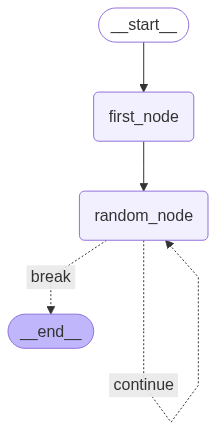

In [21]:
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
state = AgentState({'name':'badhon'})

In [23]:
app.invoke(state)

{'name': 'badhon',
 'numbers': [5, 5, 1, 5, 10],
 'message': 'Hi badhon, have a good day!!',
 'counter': 5}